# Eda on Teleco Churn

<b>Statement of problem</b> :There is a telecom company having issues with churn.They provided dataset of customers with their plans to predict the data and perform eda and prinicipal component analysis to provide meaning full insights.
<hr>
<b>Method of analysis</b> :
<li>starting with finding missing values in the dataset.There are 4 variables where data is missing.The columns are (logtoll,525)
(logequi,614)
(logcard,322)
(logwire,704).
<li>So if 70% of data is missing its better to drop that variable and its weakly corrleated to dependent variable.Hence logwire has been removed from dataset.
<li>Instead of removing missing values its better to replace with mean,median or mode and it results in better accuracy.So missing values has been replaced with the mean of that particular column for remaining three columns.
<li>Next step is to visualize each variable.So a histogram for each variable is created.By this histogram iam classfied the data as discrete data ie. kind of options and numeric data.
<li> For better understanding created a histogram for comparing with churn for each variable.This helped in finding more key insights.
<li> Difficult to analyze with 42 variable so using pca to reduce number of variables.
<li>Number of prinipal components are decided by plotting explained variance ratio.we can select as our wish for how much data need to be explained and number of prinicipal components required for them.
<hr>
<b>Findings</b> :
<li>Only 25% of the customers are churners.So we need to analyze them for to find possible reason for churn.
<li>42% of ed=5 are getting churned in level of education variable.
<li>Retired people are happy with the service because none of them are churners.
<li>42% ie(157/371) of customers who are opted for ebill are churners.
<li>44% ie(172/386) of who are equipment rental are turning out to be churners.
<li>43% of the customer who do not have call card are tend to churn.
<li>38% of who has voice option are getting churned. company wants to look at voice calls.
<li> 43% of the customers who has internet has not happy with the service.
 <li>After doing feature extraction the top 10 important columns are ['tenure', 'longten', 'loglong', 'equip', 'longmon', 'employ', 'age','address', 'ed', 'internet'].
<li>In pca principal components are 20 which can explain 90%.
<hr>
<b>Conclusions :</b>
 <li> So on a happy note only 25% are leaving service on an other way 75% of customers are happy with the service.
 <li> 42 % Customers with level of education=5 are leaving,the company should provide extra benefits or coupons for them.
 <li>The company should look at ebills may be their are getting higher that they expected and this is important as 42% of customers who opted for ebill are leaving.
 <li>The company should look at equipment rental may be their are getting high charge or faulty equipments and its important too for the company.
 <li>I think there is flaw in internet and voice call the comapny should look off as it is an important feature for retaining customers.

In [2]:
import pandas as pd
import  matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

In [3]:
data=pd.read_table('telco.txt')

In [4]:
data.head()

region  tenure  age  marital  address  income  ed  employ  retire  gender  \
0       2      13   44        1        9    64.0   4       5     0.0       0   
1       3      11   33        1        7   136.0   5       5     0.0       0   
2       3      68   52        1       24   116.0   1      29     0.0       1   
3       2      33   33        0       12    33.0   2       0     0.0       1   
4       2      23   30        1        9    30.0   1       2     0.0       0   

   ...  confer  ebill   loglong   logtoll  logequi   logcard   logwire  \
0  ...       0      0  1.308333       NaN      NaN  2.014903       NaN   
1  ...       1      0  1.481605  3.032546      NaN  2.724580  3.575151   
2  ...       1      0  2.898671  2.890372      NaN  3.409496       NaN   
3  ...       0      0  2.246015       NaN      NaN       NaN       NaN   
4  ...       1      0  1.840550       NaN      NaN       NaN       NaN   

      lninc  custcat  churn  
0  4.158883        1      1  
1  4.912655        4      1  
2  4.753590        3      0  
3  3.496508        1      1  
4  3.401197        3      0  

[5 rows x 42 columns]

In [5]:
data.describe(include='all')

region       tenure          age      marital      address  \
count  1000.0000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      2.0220    35.526000    41.684000     0.495000    11.551000   
std       0.8162    21.359812    12.558816     0.500225    10.086681   
min       1.0000     1.000000    18.000000     0.000000     0.000000   
25%       1.0000    17.000000    32.000000     0.000000     3.000000   
50%       2.0000    34.000000    40.000000     0.000000     9.000000   
75%       3.0000    54.000000    51.000000     1.000000    18.000000   
max       3.0000    72.000000    77.000000     1.000000    55.000000   

            income           ed       employ       retire       gender  ...  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  ...   
mean     77.535000     2.671000    10.987000     0.047000     0.517000  ...   
std     107.044165     1.222397    10.082087     0.211745     0.499961  ...   
min       9.000000     1.000000     0.000000     0.000000     0.000000  ...   
25%      29.000000     2.000000     3.000000     0.000000     0.000000  ...   
50%      47.000000     3.000000     8.000000     0.000000     1.000000  ...   
75%      83.000000     4.000000    17.000000     0.000000     1.000000  ...   
max    1668.000000     5.000000    47.000000     1.000000     1.000000  ...   

            confer        ebill      loglong     logtoll     logequi  \
count  1000.000000  1000.000000  1000.000000  475.000000  386.000000   
mean      0.502000     0.371000     2.182110    3.239705    3.568092   
std       0.500246     0.483314     0.734552    0.413813    0.277556   
min       0.000000     0.000000    -0.105361    1.749200    2.734368   
25%       0.000000     0.000000     1.648659    2.970414    3.367727   
50%       1.000000     0.000000     2.142999    3.208825    3.572344   
75%       1.000000     1.000000     2.668094    3.488903    3.757414   
max       1.000000     1.000000     4.604670    5.153292    4.352855   

          logcard     logwire        lninc      custcat        churn  
count  678.000000  296.000000  1000.000000  1000.000000  1000.000000  
mean     2.854209    3.598296     3.957203     2.487000     0.274000  
std      0.557286    0.367286     0.803754     1.120306     0.446232  
min      1.011601    2.701361     2.197225     1.000000     0.000000  
25%      2.463853    3.333543     3.367296     1.000000     0.000000  
50%      2.847812    3.594569     3.850148     3.000000     0.000000  
75%      3.208825    3.861780     4.418841     3.000000     1.000000  
max      4.693639    4.718052     7.419381     4.000000     1.000000  

[8 rows x 42 columns]

In [6]:
data.shape

(1000, 42)

# Handling Missing data

In [7]:
data.isnull().sum()

region        0
tenure        0
age           0
marital       0
address       0
income        0
ed            0
employ        0
retire        0
gender        0
reside        0
tollfree      0
equip         0
callcard      0
wireless      0
longmon       0
tollmon       0
equipmon      0
cardmon       0
wiremon       0
longten       0
tollten       0
equipten      0
cardten       0
wireten       0
multline      0
voice         0
pager         0
internet      0
callid        0
callwait      0
forward       0
confer        0
ebill         0
loglong       0
logtoll     525
logequi     614
logcard     322
logwire     704
lninc         0
custcat       0
churn         0
dtype: int64

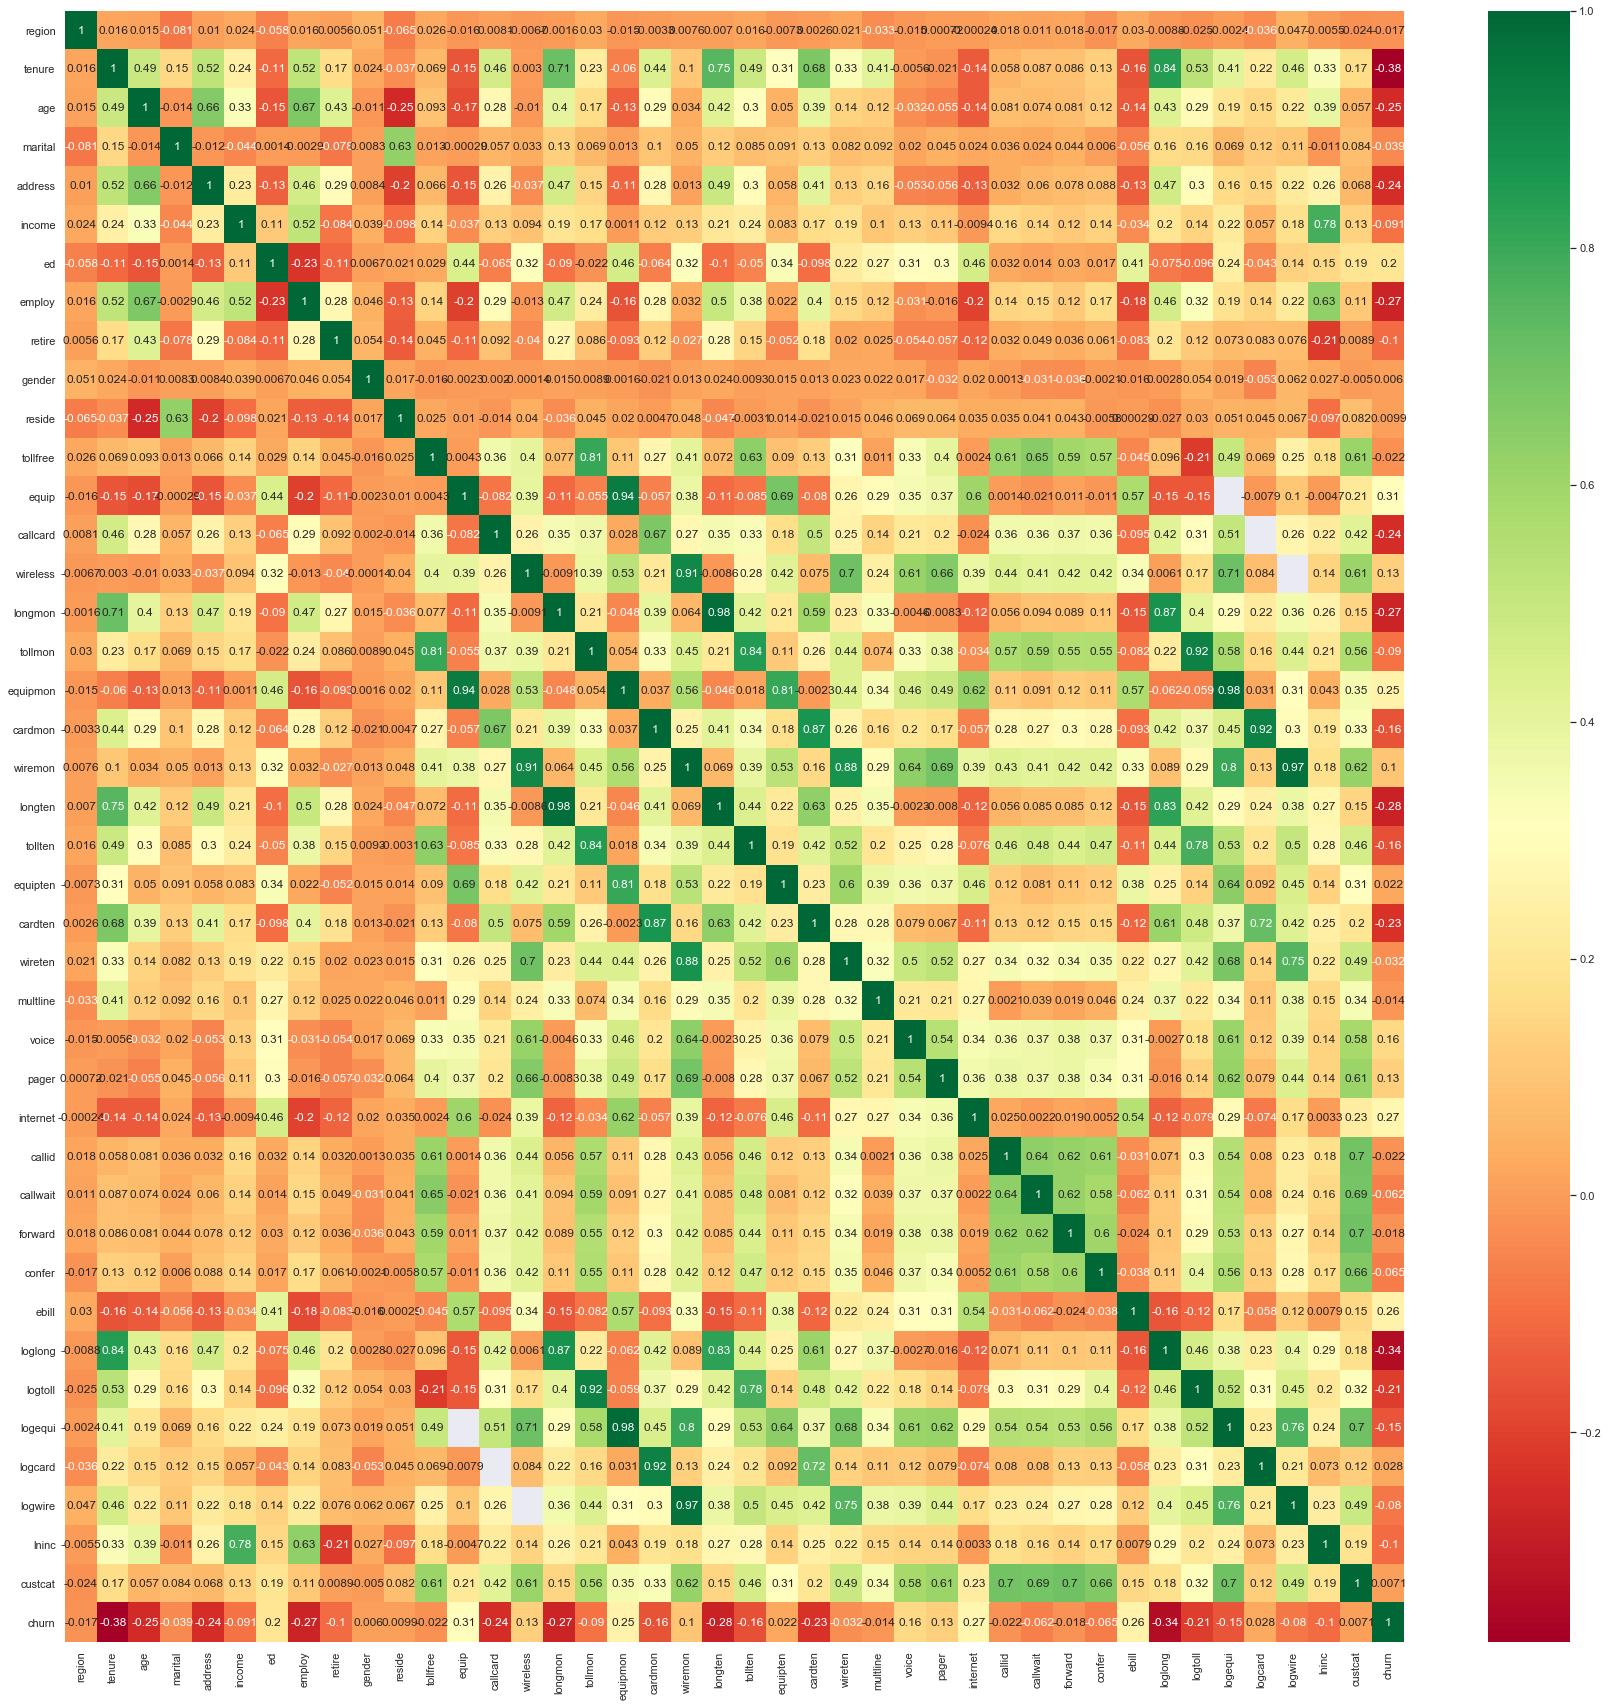

In [8]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(30,30))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")


<li>It is better to drop logwire as 70% of data is missing and by corrleation heatmap it is clear its is not that important to dependent variable.

<b>Dropping Logtoll

In [9]:
data.drop(['logwire'],inplace=True,axis=1)

<b> Replacing values with mean of the columns

In [10]:
data.fillna(data.mean(),inplace=True)

<hr>

# visualisations of each variable

In [11]:
def hist_plot(d):
    for col in d.columns:
        print(col)
        d[col].plot.hist()
        sns.set()
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.show()

region


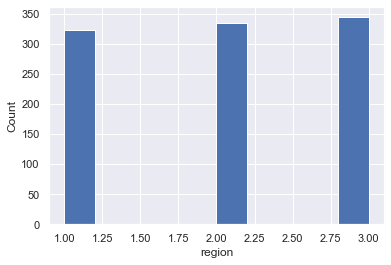

tenure


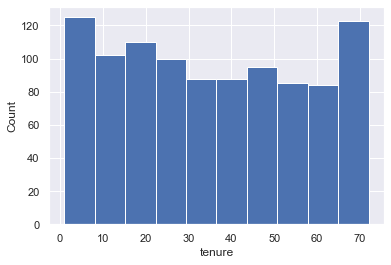

age


marital


address


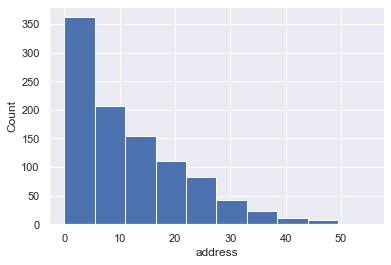

income


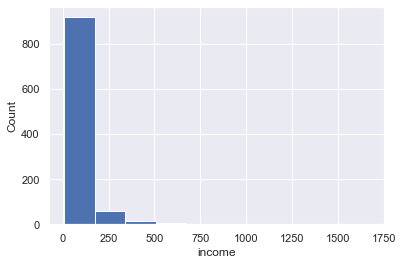

ed


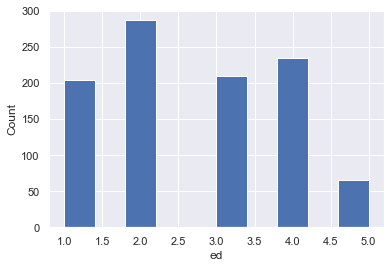

employ


retire


gender


reside


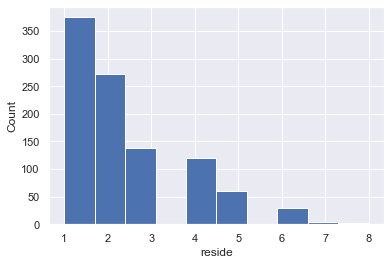

tollfree


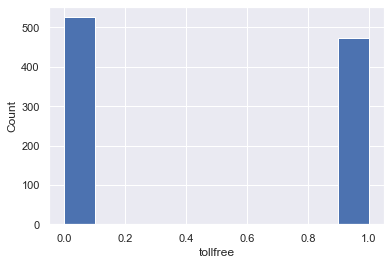

equip


callcard


wireless


longmon


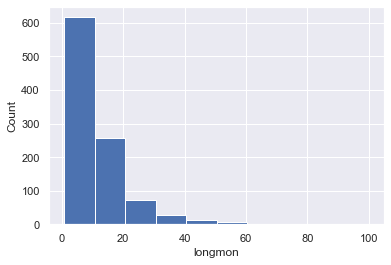

tollmon


equipmon


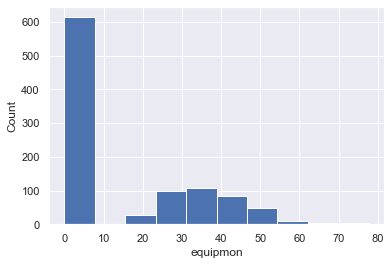

cardmon


wiremon


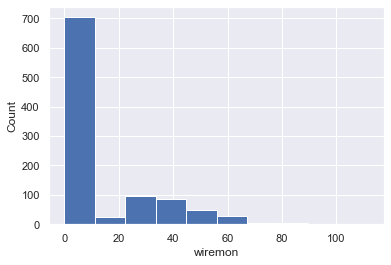

longten


tollten


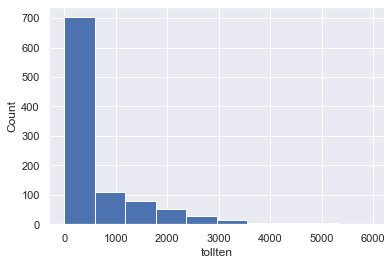

equipten


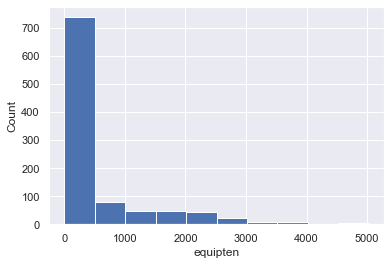

cardten


wireten


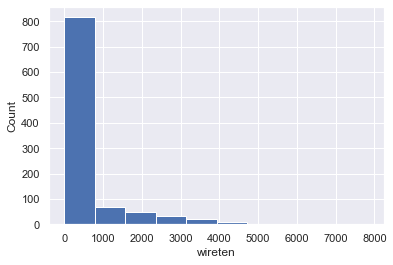

multline


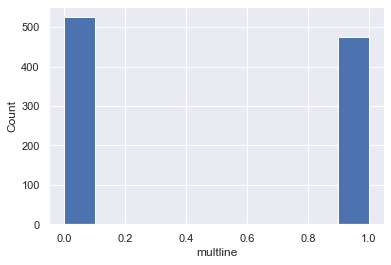

voice


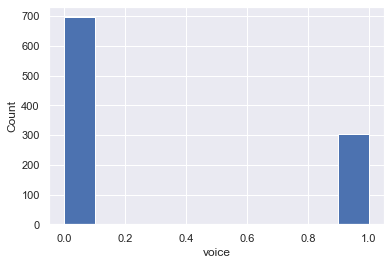

pager


internet


callid


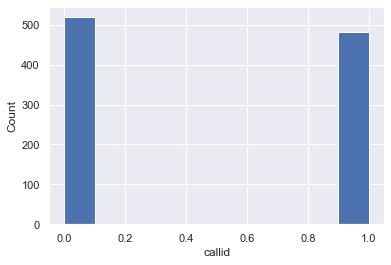

callwait


forward


confer


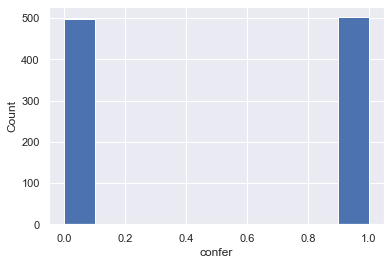

ebill


loglong


logtoll


logequi


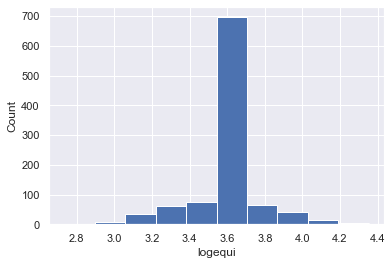

logcard


lninc


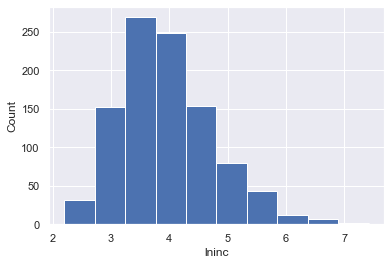

custcat


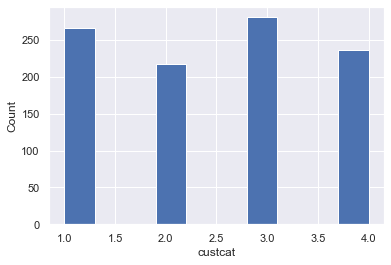

churn


In [12]:
hist_plot(data)

<b>Classifying variables as numeric and discrete columns

In [13]:
data.nunique()

region        3
tenure       72
age          60
marital       2
address      50
income      218
ed            5
employ       46
retire        2
gender        2
reside        8
tollfree      2
equip         2
callcard      2
wireless      2
longmon     425
tollmon     162
equipmon    310
cardmon     176
wiremon     263
longten     960
tollten     473
equipten    386
cardten     338
wireten     297
multline      2
voice         2
pager         2
internet      2
callid        2
callwait      2
forward       2
confer        2
ebill         2
loglong     425
logtoll     162
logequi     310
logcard     176
lninc       218
custcat       4
churn         2
dtype: int64

In [14]:
numeric_columns=['tenure','age','income','address','employ','longmon','tollmon','equipmon','cardmon','wiremon','longten','tollten','equipten','cardten','wireten','loglong','logtoll','logequi','logcard','logwire','lninc']
discrete_columns=[]
for i in data.columns:
    if i in numeric_columns:
        pass
    elif(i=='churn'):
        pass
    else:
        discrete_columns.append(i)

In [15]:
print(numeric_columns)

['tenure', 'age', 'income', 'address', 'employ', 'longmon', 'tollmon', 'equipmon', 'cardmon', 'wiremon', 'longten', 'tollten', 'equipten', 'cardten', 'wireten', 'loglong', 'logtoll', 'logequi', 'logcard', 'logwire', 'lninc']


In [16]:
c=data.internet==1
d=c.value_counts()
a=(list(data.groupby('churn'))[1][1].internet==1)
e=a.value_counts()


<b>Analyzing discrete columns

In [17]:
print(discrete_columns)

['region', 'marital', 'ed', 'retire', 'gender', 'reside', 'tollfree', 'equip', 'callcard', 'wireless', 'multline', 'voice', 'pager', 'internet', 'callid', 'callwait', 'forward', 'confer', 'ebill', 'custcat']


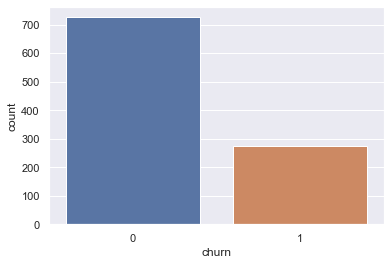

In [18]:
sns.countplot(x='churn',data=data)

<li>Only 25% of the customers are churners

In [19]:
sns.countplot(x='churn',hue='ed',data=data)

<li>42% of ed=5 are getting churned

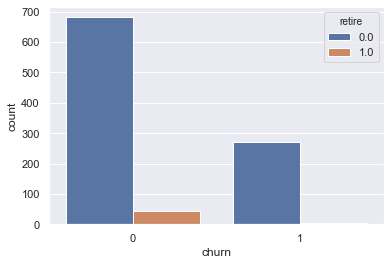

In [20]:
sns.countplot(x='churn',hue='retire',data=data)

<li>Retired people are happy with the service.

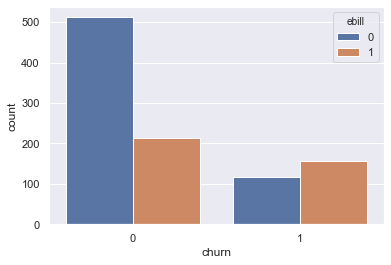

In [21]:
sns.countplot(x='churn',hue='ebill',data=data)

<li> 42% ie(157/371) of customers who are opted for ebill are churners

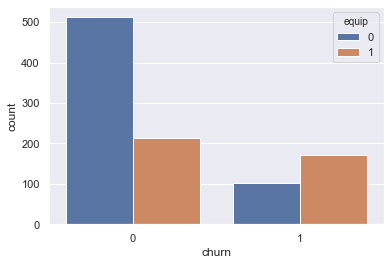

In [22]:
sns.countplot(x='churn',hue='equip',data=data)

<li>44% ie(172/386) of who are equip are turning out to be churners.

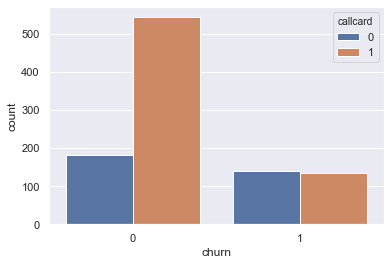

In [23]:
sns.countplot(x='churn',hue='callcard',data=data)

<li> 43% of the customer who do not have call card are tend to churn

In [24]:
sns.countplot(x='churn',hue='voice',data=data)

<li>38% of who has voice option are getting churned. company wants to look at voice calls.

In [25]:
sns.countplot(x='churn',hue='internet',data=data)

<li> 43% of the customers who has internet has not happy with the service

<b>Feature Selection

In [26]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [27]:
from sklearn.ensemble import ExtraTreesClassifier

In [28]:
model=ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [29]:
feature_importances=pd.Series(model.feature_importances_,index=x.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.show()

In [30]:
col=feature_importances.nlargest(10).index
col

Index(['tenure', 'longten', 'loglong', 'equip', 'longmon', 'employ', 'age',
       'address', 'ed', 'internet'],
      dtype='object')

# PCA

In [34]:
x=data.drop(['churn'],axis=1)
y=data['churn']

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler=StandardScaler()
scaler.fit(x)
x_std=scaler.transform(x)

<b>Covaraince Matrix

In [37]:
np.cov(x_std.T)    # diagnol are same

array([[ 1.001001  ,  0.01640483,  0.01504905, ..., -0.02941708,
        -0.0055339 , -0.02379445],
       [ 0.01640483,  1.001001  ,  0.49070797, ...,  0.18036736,
         0.33347459,  0.16685742],
       [ 0.01504905,  0.49070797,  1.001001  , ...,  0.12803303,
         0.38885728,  0.05696589],
       ...,
       [-0.02941708,  0.18036736,  0.12803303, ...,  1.001001  ,
         0.06182579,  0.0948476 ],
       [-0.0055339 ,  0.33347459,  0.38885728, ...,  0.06182579,
         1.001001  ,  0.19115331],
       [-0.02379445,  0.16685742,  0.05696589, ...,  0.0948476 ,
         0.19115331,  1.001001  ]])

<b>Eigen values and Eigen vectors

In [38]:
cov_mat=np.cov(x_std.T)
eig_val,eig_vec=np.linalg.eig(cov_mat)
print('Eigen values',eig_val)
print('eigen vectors',eig_vec)

Eigen values [9.67208687e+00 6.32722233e+00 3.75659326e+00 2.17398140e+00
 1.68858099e+00 1.53990524e+00 1.31026865e+00 1.12209624e+00
 1.10797418e+00 1.04795073e+00 9.58206045e-01 8.48540571e-01
 7.77664581e-01 6.86089640e-01 6.40113681e-01 6.25432271e-01
 5.83996766e-01 5.39223130e-01 4.85582674e-01 4.65329718e-01
 4.32996219e-01 4.05862750e-01 3.74071800e-01 3.50343602e-01
 3.60960543e-01 3.13160317e-01 2.90388632e-01 1.27869539e-03
 3.10905008e-03 1.74164222e-02 2.27634698e-02 2.88350352e-02
 2.10469595e-01 2.02478338e-01 7.45258647e-02 1.45811823e-01
 9.22501346e-02 1.29492047e-01 1.07676088e-01 1.19310646e-01]
eigen vectors [[ 1.20011283e-03  5.67388710e-03 -1.32940409e-02 ...  1.56917562e-02
   7.37899535e-03 -5.56861311e-05]
 [ 1.73775015e-01  2.39749330e-01  1.78278807e-01 ... -4.69143833e-02
  -3.11688160e-01 -2.75221319e-02]
 [ 1.16141036e-01  2.17977316e-01  7.20473716e-02 ...  2.28055657e-02
  -1.85740361e-02  7.00874596e-02]
 ...
 [ 9.04553492e-02  8.07559821e-02  5.46562

In [39]:
eig_pairs=[(np.abs(eig_val[i]),eig_vec[:,i]) for i in range(len(eig_val))]
print('Eigen values in descending orders')
for i in eig_pairs:
    print(i[0])

Eigen values in descending orders
9.672086869886765
6.327222329739911
3.7565932634767325
2.1739813967987454
1.6885809906800873
1.5399052429817583
1.3102686526001845
1.12209624361357
1.1079741751275374
1.047950725593916
0.958206045251669
0.848540570888599
0.7776645811695366
0.6860896397703865
0.640113680578865
0.6254322712642293
0.5839967658733501
0.539223130061455
0.4855826738747171
0.4653297179134937
0.43299621913580366
0.4058627496333613
0.3740718001848257
0.35034360226284206
0.3609605429399033
0.3131603172150506
0.290388632146537
0.001278695387428234
0.003109050075953354
0.01741642216749611
0.022763469790481137
0.02883503518208445
0.21046959513450386
0.2024783376466612
0.0745258647040086
0.14581182287406932
0.0922501346290077
0.1294920471903985
0.10767608830881026
0.11931064628532707


In [40]:
from sklearn.decomposition import PCA

In [41]:
pca=PCA().fit(x_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('cumulative explained variance')
plt.show()

<li>This graph clearly explains number of components with help of explained varaince ratio.

In [42]:
pca=PCA(n_components=0.90)
x_pca=pca.fit_transform(x_std)
pca_evr=pca.explained_variance_ratio_
pca_evr

array([0.24156037, 0.15802238, 0.09382092, 0.05429519, 0.04217231,
       0.03845913, 0.03272396, 0.02802435, 0.02767166, 0.02617257,
       0.0239312 , 0.0211923 , 0.01942217, 0.01713509, 0.01598684,
       0.01562017, 0.01458532, 0.0134671 , 0.01212743, 0.01162161])

In [43]:
pca_evr.sum() # so 90% has been selected as a result we got 20 components.

0.9080120532044587

In [44]:
x_pca.shape

(1000, 20)

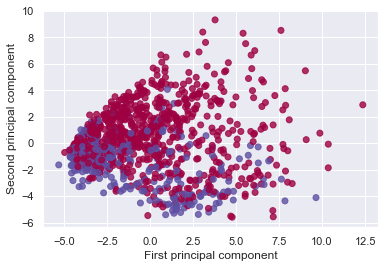

In [45]:
plt.scatter(x_pca[:,0],x_pca[:,1],c=data['churn'],alpha=0.8,cmap='Spectral')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.show()

In [46]:
df=pd.DataFrame(x_pca,columns=["pc"+str(i) for i in range(1,21)])

In [47]:
df.head()

pc1       pc2       pc3       pc4       pc5       pc6       pc7  \
0 -3.068315  0.126000 -0.706704  0.463656 -0.787697  0.025662 -0.442818   
1  1.594945 -2.531510 -3.168899 -0.266948 -2.168621 -1.122922 -1.078161   
2  1.859624  4.026085 -1.060556 -0.010553 -0.208561 -1.456412 -1.041980   
3 -3.733042  0.845615  0.102981  0.181185  0.608441  0.600357  1.230219   
4 -2.380051 -0.064794 -2.080892 -1.392726 -0.916120  0.436705 -0.158716   

        pc8       pc9      pc10      pc11      pc12      pc13      pc14  \
0  0.745324  0.606892 -0.975914 -0.706075  0.262078 -1.381383  0.789632   
1  0.533357  1.112958  0.066360 -1.305408 -2.015670 -0.091507  1.112731   
2  0.078316  0.157795  1.900673 -0.611785  0.670001  0.807380  0.140274   
3  1.376379 -0.364908 -0.083162  0.861134  0.036115  0.934578  0.129847   
4  0.091094  0.593269 -0.785368 -0.885239 -0.114668  0.968721 -2.038068   

       pc15      pc16      pc17      pc18      pc19      pc20  
0 -0.098359 -1.515402 -0.008452  1.062283  0.247354  0.124099  
1  0.487278 -0.894988  0.275378  1.357037  0.739379  0.373386  
2 -0.567274  0.517314  0.572231 -0.571923 -0.647924  0.015412  
3 -0.337825 -0.236297  0.682227 -0.248776  0.276974 -0.140183  
4 -0.100359 -0.801571  0.427600 -0.176508 -0.589739  0.075814

In [48]:
sns.pairplot(df,diag_kind='kde')
plt.show()

<b><center>Thank you